<a href="https://colab.research.google.com/github/Weverton-Vitor/multiclass-semantic-segmentation-unet/blob/main/multiclass_semantic_segmentation_with_tensorlfow_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass segmentation using TensorFlow

## 1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 2. Import Libs

In [33]:
from keras.utils import normalize
import os
import zipfile
import glob
import random
from PIL import Image, ImageSequence
import numpy as np
from matplotlib import pyplot as plt

## 3. Open and preprocess the dataset
In this dataset we already have the masks, so we can just open them

### 3.1 Unzip the dataset

In [6]:
dataset_zip_path = "/content/drive/MyDrive/Colab Notebooks/My Projects/datasets/sandstone_data_for_ML.zip"
with zipfile.ZipFile(dataset_zip_path) as file:
  file.extractall('./')

In [121]:
# Resize the images to this values
SIZE_X = 128
SIZE_Y = 128

# Num of classes
n_class = 4

def get_images_from_directory(images_path: str) -> list:
  images = []
  image = Image.open(images_path)


  for frame in range(image.n_frames):
    image.seek(frame)

    images.append(image.copy())

  return images


In [122]:
images = get_images_from_directory('/content/sandstone_data_for_ML/full_labels_for_deep_learning/128_patches/images_as_128x128_patches.tif')

In [123]:
len(images)

1600

### 3.2 View some samples

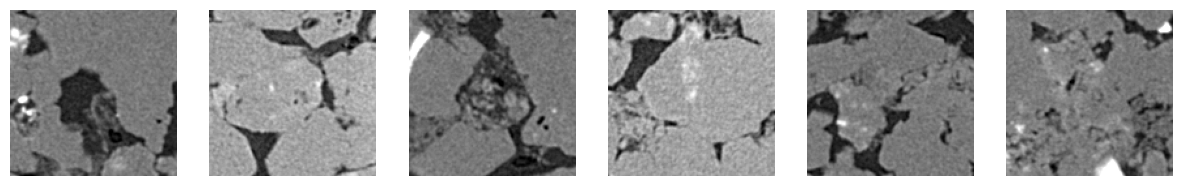

In [132]:
n_samples = 6
random_samples = random.choices(images, k=n_samples)
fig = plt.figure(figsize=(15, 15))

for i, sample in enumerate(random_samples):
  fig.add_subplot(1, n_samples, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.axis('off')